<a href="https://colab.research.google.com/github/linhsuan519/hello-colab/blob/main/%E9%81%8E%E5%BA%A6%E6%93%AC%E5%90%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#繪製學習曲線和驗證曲線。
過度擬合的問題，驗證曲線則會顯示出隨著模型複雜度增加，訓練分數增加而驗證分數下降

1.簡化模型：減少特徵數量，降低模型複雜度

2.收集更多資料：增加訓練資料量，減少訓練資料的噪聲

3.使用正則化：在模型訓練過程中加入正則化項，控制模型複雜度


學習曲線


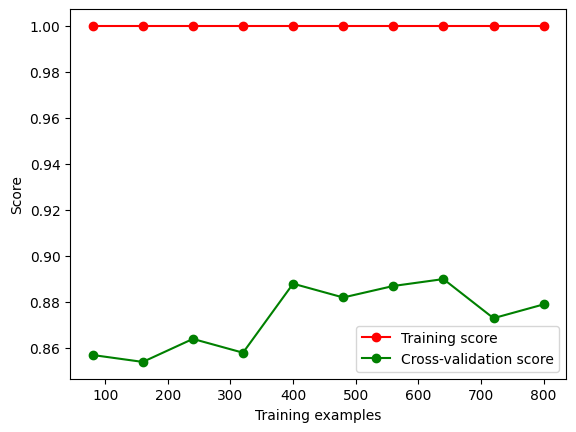

驗證曲線


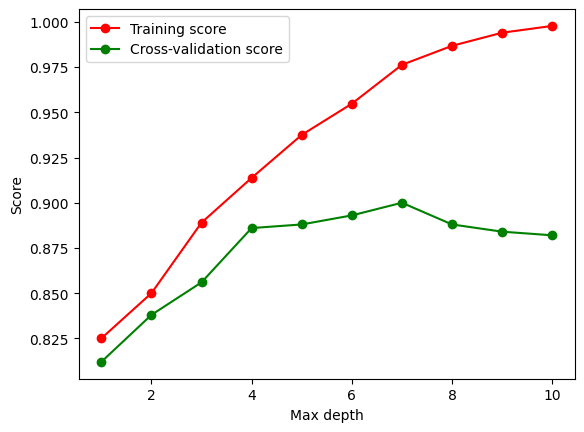

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.tree import DecisionTreeClassifier

# 生成一個假的二元分類資料集
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# 建立決策樹模型
dt = DecisionTreeClassifier(random_state=42)

# 計算學習曲線
train_sizes, train_scores, test_scores = learning_curve(estimator=dt, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# 繪製學習曲線
import matplotlib.pyplot as plt
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
print('學習曲線')
plt.show()

# 計算驗證曲線
param_range = np.arange(1, 11)
train_scores, test_scores = validation_curve(estimator=dt, X=X, y=y, param_name="max_depth", param_range=param_range, cv=5)

# 繪製驗證曲線
plt.plot(param_range, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Max depth")
plt.ylabel("Score")
plt.legend(loc="best")
print('驗證曲線')
plt.show()